<a href="https://colab.research.google.com/github/sathvik8317/Simple-ML-Model-FLask-Deployment/blob/main/Online_Shopping_Intention_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

Reading the data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/online_shoppers_intention.csv')

Top 5 rows of the dataset

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


Checking missing values

In [4]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
x = df.iloc[:,[5,6]].values
print(x.shape)

(12330, 2)


In [6]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.p

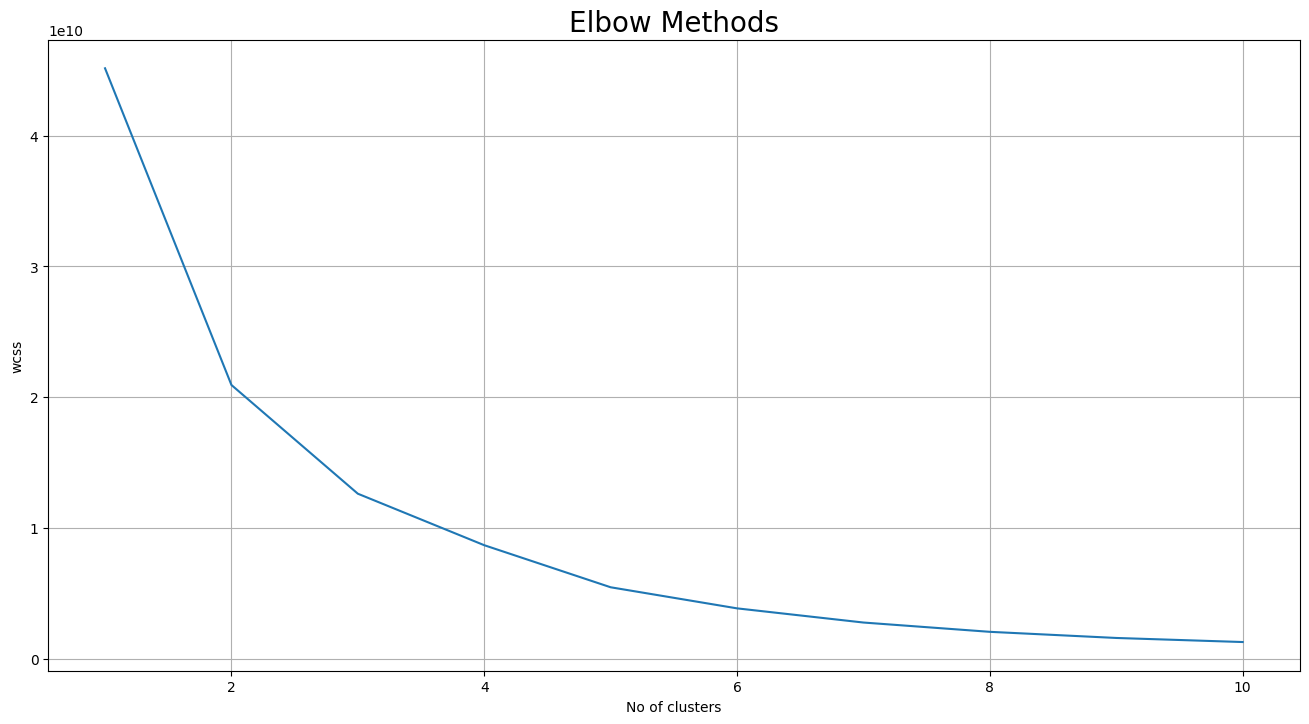

In [7]:
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0,algorithm='full',tol=0.001)
  km.fit(x)
  labels = km.labels_
  wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (13,7)
plt.plot(range(1,11),wcss)
plt.grid()
plt.tight_layout()
plt.title('Elbow Methods',fontsize = 20)
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

According to the graph above, the maximum curvature is at the second index, that is, the number of optimal clustering groups for the duration of the product and the bounce rates is 2. Once the number of clusterings determined, we apply the K Means method and plot the clusters

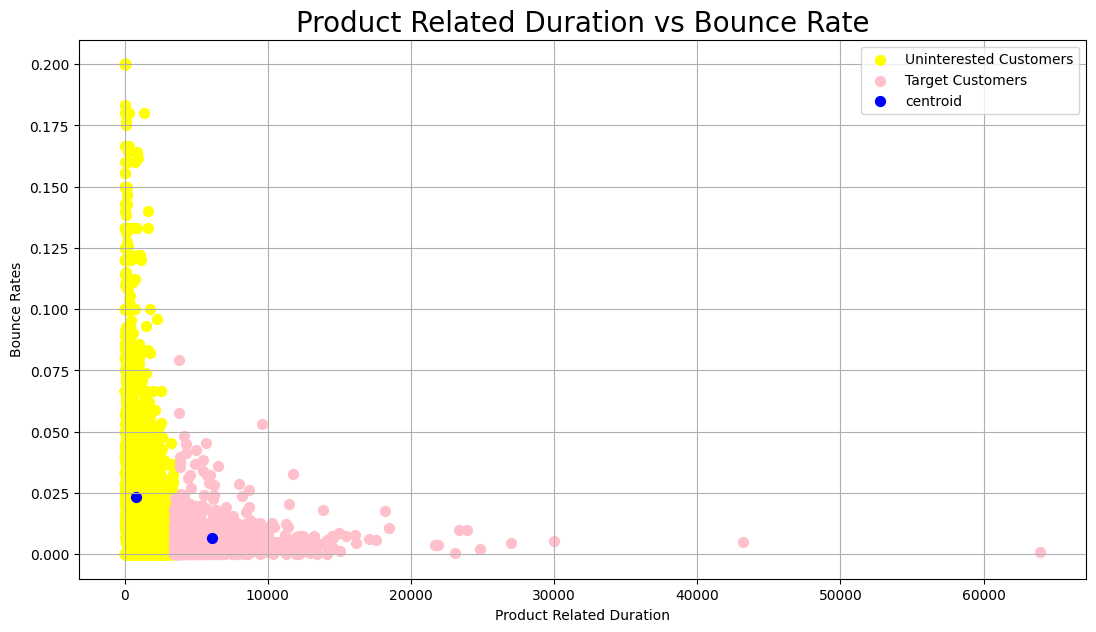

In [10]:
km = KMeans(n_clusters = 2,init = 'k-means++',max_iter =300,n_init=10,random_state=0)
# get predicted cluster index for each sample 0,1,2
y_means = km.fit_predict(x)

plt.scatter(x[y_means==0,0],x[y_means==0,1],s=50,c='yellow',label='Uninterested Customers')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=50,c='pink',label='Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=50,c='blue',label = 'centroid')

plt.title('Product Related Duration vs Bounce Rate',fontsize =20)
plt.grid()
plt.xlabel('Product Related Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()


By looking at above plot , we can say that customers who spent more time on product-related website are less likely to leave the website after viewing a single page

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
labels_true = encoder.fit_transform(df['Revenue'])

In [12]:
# get predicted clustering result label
labels_pred = y_means

from sklearn import metrics
score = metrics.adjusted_rand_score(labels_true,labels_pred)
print('Adjusted rand index: ')
print(score)

Adjusted rand index: 
0.08359442469281096


In [15]:
!pip install scikitplot

ERROR: Could not find a version that satisfies the requirement scikitplot (from versions: none)
ERROR: No matching distribution found for scikitplot


In [16]:
# import scikitplot as skplt
# plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
# plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True)

From the confusion matrix, we can see that out of 10,422 failed incomes, 9,769 are grouped into uninterested customers or 94%. However, out of 937 successful incomes, only 284 are grouped as target customers or 15%. Also, the adjusted index score is not very high.